In [1]:
import numpy as np


#加载数据
def load_data():
    with open('简单线性数据.txt') as fr:
        lines = fr.readlines()

    x = np.empty((len(lines)), dtype=float)
    y = np.empty(len(lines), dtype=float)

    for i in range(len(lines)):
        line = lines[i].strip().split('\t')
        x[i] = line[0]
        y[i] = line[1]

    return x, y


x, y = load_data()
x[:5], y[:5]

(array([0.067732, 0.42781 , 0.995731, 0.738336, 0.981083]),
 array([3.176513, 3.816464, 4.550095, 4.256571, 4.560815]))

In [2]:
#常量
N = len(x)
w = 2.0
b = 2.0

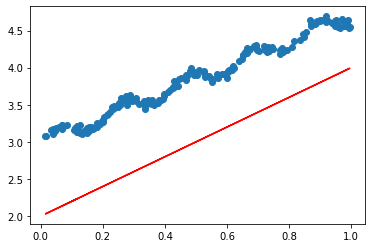

In [3]:
import matplotlib.pyplot as plt


def draw():
    Y = np.empty(len(x))
    for i in range(len(x)):
        Y[i] = w * x[i] + b

    plt.scatter(x, y)
    plt.plot(x, Y, c='red')

    plt.show()


draw()

In [4]:
#预测函数
def predict(x):
    return w * x + b


predict(x[0]), y[0]

(2.135464, 3.176513)

In [5]:
#求loss,就是简单的做差求平方和
def get_loss():
    loss = 0
    for i in range(N):
        loss += np.power(predict(x[i]) - y[i], 2)
    return loss


get_loss()

150.50416404192197

In [6]:
#求w梯度
#为了简化,这里假设只有两个样本
#loss = (w*x1 + b - y1)^2 + (w*x2 + b - y2)^2
#定义z1 = b - y1
#定义z2 = b - y2
#带入得
#loss = (w * x1 + z1)^2 + (w*x2 + z2)^2
#平方和公式
#loss = w^2*x1^2 + z1^2 + 2*w*z1*x1 + w^2*x2^2 + z2^2 + 2*w*x2*z2
#提取公因数
#loss = w^2*(x1^2 + x2^2) + 2*w*(z1*x1 + z2*x2) + z1^2 + z2^2
#求导数
#d_loss/d_w = 2*w*(x1^2 + x2^2) + 2*(z1*x1 + z2*x2)
#定义A = 2*w*(x1^2 + x2^2)
#带回z1和z2
#d_loss/d_w = A + 2*[(b - y1)*x1 + (b - y2)*x2]
#分配率,并调整顺序
#d_loss/d_w = A - 2*y1*x1 - 2*y2*x2 + 2*b*x1 + 2*b*x2
#加括号
#d_loss/d_w = A - {2*y1*x1 + 2*y2*x2 - 2*b*x1 - 2*b*x2}
#提取公因数
#d_loss/d_w = A - {2*[(y1 - b)*x1 + (y2 - b)*x2]}
#带回A
#d_loss/d_w = 2*w*(x1^2 + x2^2) - {2*[(y1 - b)*x1 + (y2 - b)*x2]}
#提取公因数
#d_loss/d_w = 2*{w*(x1^2 + x2^2) - [(y1 - b)*x1 + (y2 - b)*x2]}
#整理成一般形式,这就是书上的公式了.
#d_loss/d_w = 2*{w*[sigma(xi^2)] - [sigma((yi - b)*xi)]}


#求b梯度
#为了简化,这里假设只有两个样本
#loss = (w*x1 - y1 + b)^2 + (w*x2 - y2 + b)^2
#定义z1 = w*x1 - y1
#定义z2 = w*x2 - y2
#带入得
#loss = (z1 + b)^2 + (z2 + b)^2
#平方和公式
#loss = z1^2 + b^2 + 2*z1*b + z2^2 + b^2 + 2*z2*b
#求导数
#d_loss/d_b = 2*b + 2*z1 + 2*b + 2*z2
#提取公因数
#d_loss/d_b = 2*[b + b + z1 + z2]
#带回z1和z2
#d_loss/d_b = 2*[b + b + w*x1 - y1 + w*x2 - y2]
#调整顺序
#d_loss/d_b = 2*[b + b - y1 + w*x1 - y2 + w*x2]
#加括号
#d_loss/d_b = 2*[b + b - (y1 - w*x1 + y2 - w*x2)]
#整理成一般形式,这就是书上的公式了.
#d_loss/d_b = 2*[N*b - sigma(yi - w*xi)]
def get_gradient():

    #d_loss/d_w = 2*{w*[sigma(xi^2)] - [sigma((yi - b)*xi)]}
    sigma1 = 0
    sigma2 = 0
    for i in range(N):
        sigma1 += np.power(x[i], 2)
        sigma2 += (y[i] - b) * x[i]
    _w = 2 * (w * sigma1 - sigma2)

    #d_loss/d_b = 2*[N*b - sigma(yi - w*xi)]
    sigma3 = 0
    for i in range(N):
        sigma3 += y[i] - w * x[i]
    _b = 2 * (N * b - sigma3)

    return _w, _b


get_gradient()

(-157.37314896242987, -343.58540000000016)

54.658990441682484
3.2555823305077998
3.1314882899961223
3.016683995019165
2.9092999179300887
2.808856431724879
2.7149049428763417
2.627025851953277
2.544826679634529
2.4679403138458404
2.3960233701901608
2.3287546583487226
2.2658337476038017
2.2069796250764897
2.1519294406870477
2.1004373332326356
2.0522733323395586
2.007222331386031
1.9650831268083038
1.9256675194997124
1.8887994742892398
1.8543143337457995
1.8220580827970052
1.7918866608780164
1.76366531853855
1.7372680156345102
1.712576858416469
1.6894815730010575
1.6678790128735987
1.6476726982225085


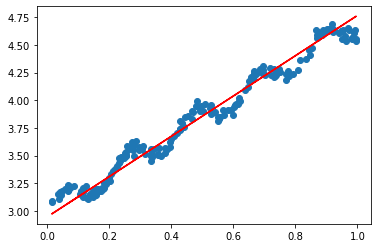

(1.8222910484218504, 2.9452208364605506)

In [7]:
#慢慢调整w和b
for i in range(300):
    _w, _b = get_gradient()
    w -= _w * 1e-4
    b -= _b * 1e-3

    if i % 10 == 0:
        print(get_loss())

draw()
w, b